In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
# data (as pandas dataframes) 
X = wine_quality.data.features 


y = wine_quality.data.targets 
# metadata 
print(wine_quality.metadata) 
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [3]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [4]:
X = X.apply(zscore)
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-3.849639e-16,1.049902e-16,2.187295e-17,3.499672e-17,1.749836e-17,-8.749179e-17,-6.999344e-17,-3.552167e-15,2.729744e-15,-5.424491e-16,6.561885e-16
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00


(array([  30.,  216.,    0., 2138.,    0., 2836., 1079.,    0.,  193.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <BarContainer object of 10 artists>)

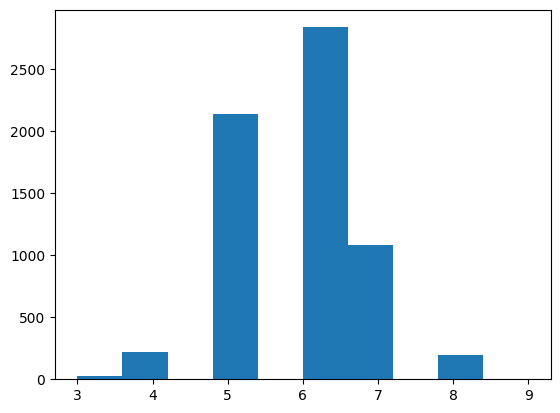

In [5]:
plt.hist(y)


In [6]:
# Splitting dataset
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating binary target variable
train_y["target"] = (train_y["quality"] > 5).astype(int)
test_y["target"] = (test_y["quality"] > 5).astype(int)

# Dropping the original 'quality' column
train_y.drop(columns=["quality"], inplace=True)
test_y.drop(columns=["quality"], inplace=True)

# Convert to PyTorch tensors
train_x = torch.tensor(train_x.values, dtype=torch.float32)
test_x = torch.tensor(test_x.values, dtype=torch.float32)
train_y = torch.tensor(train_y.values, dtype=torch.long).squeeze()  # Remove extra dimension
test_y = torch.tensor(test_y.values, dtype=torch.long).squeeze()    # Remove extra dimension

# Creating TensorDataset
train = TensorDataset(train_x, train_y)
test = TensorDataset(test_x, test_y)

# Check shapes
print(f"Train X Shape: {train_x.shape}, Train Y Shape: {train_y.shape}")
print(f"Test X Shape: {test_x.shape}, Test Y Shape: {test_y.shape}")

Train X Shape: torch.Size([5197, 11]), Train Y Shape: torch.Size([5197])
Test X Shape: torch.Size([1300, 11]), Test Y Shape: torch.Size([1300])


In [7]:
train_y.shape

torch.Size([5197])

In [8]:

class ANN_Model(nn.Module):  # Fixed parent class
    def __init__(self, batch_size, learning_rate, epochs, train_data, test_data):
        super().__init__()
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Define layers
        self.fc1 = nn.Linear(11, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 1)  # Fixed last layer

        self.train_data = train_data
        self.test_data = test_data

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)  # Fixed last layer
        return x

    def train_model(self):
        train_loader = DataLoader(self.train_data, batch_size=self.batch_size, shuffle=True, drop_last=True)
        test_loader = DataLoader(self.test_data, batch_size=len(self.test_data.tensors[0]))

        loss_function = nn.BCEWithLogitsLoss()
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)

        epoch_tensor = torch.zeros(self.epochs)
        avg_train_loss_tensor = torch.zeros(self.epochs)
        avg_test_loss_tensor = torch.zeros(self.epochs)
        accuracy_tensor = torch.zeros(self.epochs)
        for epoch in range(self.epochs):
            self.train()  # Set to training mode
            total_train_loss = 0

            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                outputs = self.forward(X_batch).squeeze()  # Forward pass
                loss = loss_function(outputs, y_batch.float())  # Compute loss
                loss.backward()  # Backpropagation
                optimizer.step()  # Update weights

                total_train_loss += loss.item()

            avg_train_loss = total_train_loss / len(train_loader)
            # Evaluation on test data
            self.eval()  # Set to evaluation mode
            total_test_loss = 0
            correct = 0
            total = 0

            with torch.no_grad(): #disable gradient computation during evaluation to save mermory and save up the computation
                for X_test, y_test in test_loader:
                    test_outputs = self.forward(X_test).squeeze()
                    test_loss = loss_function(test_outputs, y_test.float())
                    total_test_loss += test_loss.item()

                    # Convert logits to probabilities
                    predicted = torch.sigmoid(test_outputs).round()
                    correct += (predicted == y_test).sum().item()
                    total += y_test.size(0)

            avg_test_loss = total_test_loss / len(test_loader)
            accuracy = correct / total * 100
           
            avg_train_loss_tensor[epoch] = avg_train_loss
            avg_test_loss_tensor[epoch] = avg_test_loss
            accuracy_tensor [epoch] = accuracy
            epoch_tensor[epoch] = epoch
        return avg_train_loss_tensor, avg_test_loss_tensor, accuracy_tensor, epoch_tensor
                


In [9]:

model = ANN_Model(batch_size=16, learning_rate=0.01, epochs=1000, train_data=train, test_data=test)
avg_train_loss_tensor, avg_test_loss_tensor, accuracy_tensor, epoch_tensor = model.train_model()

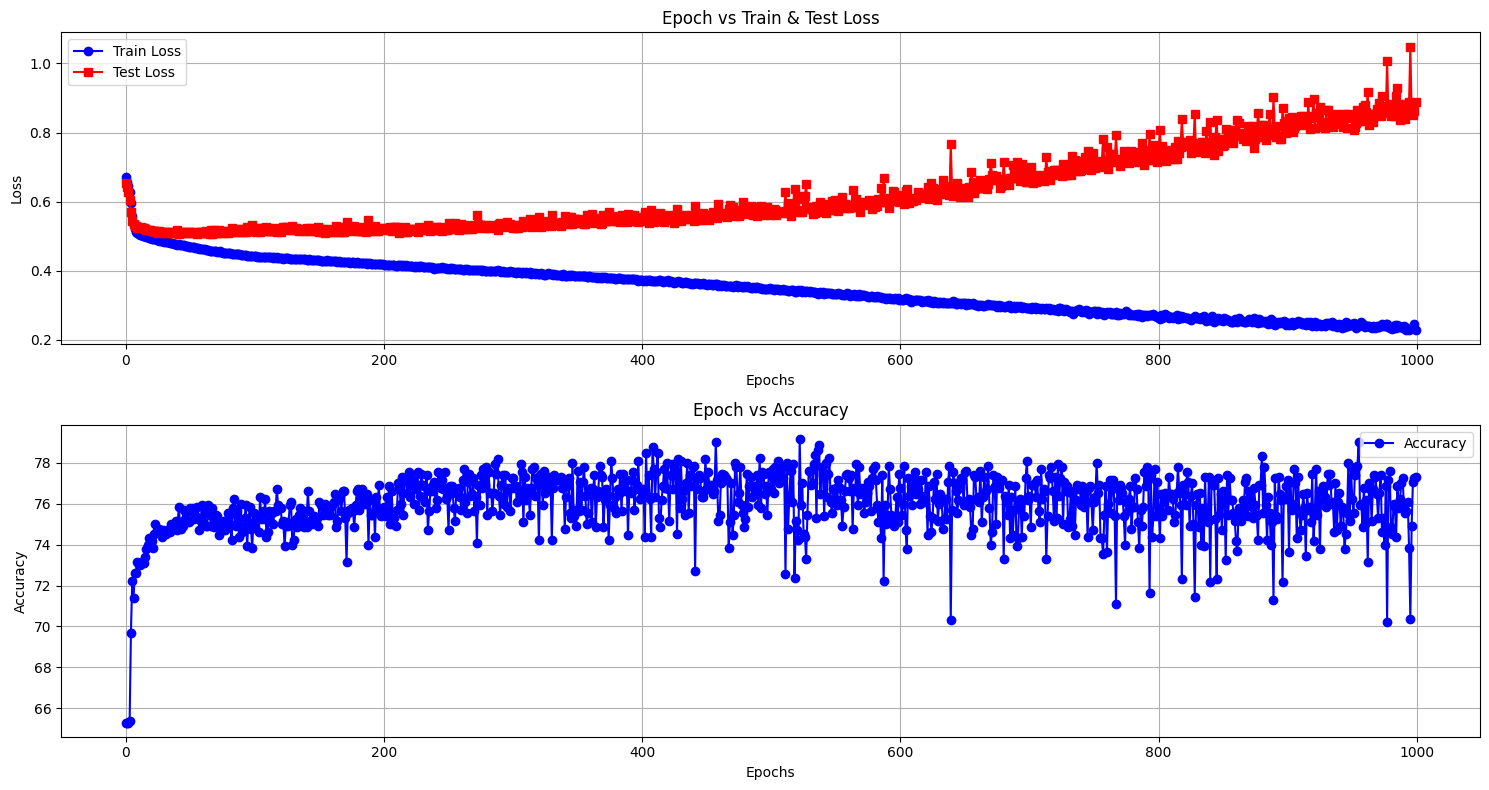

In [10]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

# Graph 1: Train Loss vs Test Loss
axs[0].plot(epoch_tensor, avg_train_loss_tensor, label="Train Loss", color='blue', marker='o')
axs[0].plot(epoch_tensor, avg_test_loss_tensor, label="Test Loss", color='red', marker='s')
axs[0].set_title("Epoch vs Train & Test Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# Graph 2: Epoch vs Accuracy
axs[1].plot(epoch_tensor, accuracy_tensor, label="Accuracy", color='blue', marker='o')
axs[1].set_title("Epoch vs Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
axs[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()